In [3]:
import pandas as pd
import sqlite3 as sql3
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup as bs

In [4]:
%matplotlib inline
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [5]:

def generetPie(serie, title=""):
    
    texto, fatias = plt.pie(serie.value_counts(), startangle=90  )
    plt.legend(texto,serie.value_counts().index,bbox_to_anchor = (1.25, 1), title=title)



#Função para gerar cores aletórias
def generetColor(num):
    listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
    return list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))



In [6]:
conn = sql3.connect('PJe-TRF.sqlite3/PJe-TRF.sqlite3')

In [7]:
qtdLinhas = 1000

# Lendo os dados das decisões

In [8]:
decisoes = pd.read_sql('''
    SELECT * FROM decisoes limit {}
'''.format(qtdLinhas), con=conn)

In [9]:
decisoes.head()

,num_processo,documento,html
0,0819306-76.2017.4.05.8300,31/08/2018 14:04:40 - Inteiro Teor - Inteiro T...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he..."
1,0819306-76.2017.4.05.8300,31/08/2018 14:04:40 - Inteiro Teor - Inteiro T...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he..."
2,0819306-76.2017.4.05.8300,13/06/2018 12:39:16 - Sentença - Sentença,"<html xmlns=""http://www.w3.org/1999/xhtml""><he..."
3,0819306-76.2017.4.05.8300,21/05/2018 17:50:07 - Sentença - Sentença,"<html xmlns=""http://www.w3.org/1999/xhtml""><he..."
4,0819306-76.2017.4.05.8300,15/02/2018 16:12:07 - Decisão - Decisão,"<html xmlns=""http://www.w3.org/1999/xhtml""><he..."


In [10]:
# separando os dados das decisões em duas colunas
decisoes['data'] = ''
for index, row in decisoes.iterrows():
    string = decisoes.iloc[index]['documento'] 
    pos = string.find('-')
    decisoes.iloc[index]['data'] = string[0:pos]
    decisoes.iloc[index]['documento'] = string[pos+1 :]    

In [11]:
decisoes.head() 

,num_processo,documento,html,data
0,0819306-76.2017.4.05.8300,Inteiro Teor - Inteiro Teor do Acórdão,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",31/08/2018 14:04:40
1,0819306-76.2017.4.05.8300,Inteiro Teor - Inteiro Teor do Acórdão,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",31/08/2018 14:04:40
2,0819306-76.2017.4.05.8300,Sentença - Sentença,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",13/06/2018 12:39:16
3,0819306-76.2017.4.05.8300,Sentença - Sentença,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",21/05/2018 17:50:07
4,0819306-76.2017.4.05.8300,Decisão - Decisão,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",15/02/2018 16:12:07


# Lendo sobre movimentações

In [13]:
movimentacoes = pd.read_sql('''
    SELECT * FROM movimentacoes limit {}
'''.format(qtdLinhas), con=conn)

In [14]:
movimentacoes.head()

,movimento,documento,aplicacao,num_processo
0,30/11/2018 11:11:37 - Juntada de Recurso Extra...,None,2º Grau,0819306-76.2017.4.05.8300
1,30/11/2018 11:10:18 - Juntada de Recurso Especial,None,2º Grau,0819306-76.2017.4.05.8300
2,25/11/2018 00:01:33 - Juntada de Certidão de I...,25/11/2018 00:01:33 - Certidão de Intimação - ...,2º Grau,0819306-76.2017.4.05.8300
3,19/11/2018 10:29:49 - Juntada de Certidão de I...,19/11/2018 10:29:48 - Certidão de Intimação - ...,2º Grau,0819306-76.2017.4.05.8300
4,14/11/2018 19:46:51 - Expedição de expediente,None,2º Grau,0819306-76.2017.4.05.8300


In [15]:
# separando os dados das decisões em duas colunas
movimentacoes['data_movimento'] = ''
for index, row in movimentacoes.iterrows():
    string = movimentacoes.iloc[index]['movimento'] 
    pos = string.find('-')
    movimentacoes.iloc[index]['data_movimento'] = string[0:pos]
    movimentacoes.iloc[index]['movimento'] = string[pos+1 :]    

In [16]:
movimentacoes.head()


,movimento,documento,aplicacao,num_processo,data_movimento
0,Juntada de Recurso Extraordinário,None,2º Grau,0819306-76.2017.4.05.8300,30/11/2018 11:11:37
1,Juntada de Recurso Especial,None,2º Grau,0819306-76.2017.4.05.8300,30/11/2018 11:10:18
2,Juntada de Certidão de Intimação,25/11/2018 00:01:33 - Certidão de Intimação - ...,2º Grau,0819306-76.2017.4.05.8300,25/11/2018 00:01:33
3,Juntada de Certidão de Intimação,19/11/2018 10:29:48 - Certidão de Intimação - ...,2º Grau,0819306-76.2017.4.05.8300,19/11/2018 10:29:49
4,Expedição de expediente,None,2º Grau,0819306-76.2017.4.05.8300,14/11/2018 19:46:51


In [17]:
# separando os dados das decisões em duas colunas
movimentacoes['data_documento'] = ''
for index, row in movimentacoes.iterrows():
    try:
        string = movimentacoes.iloc[index]['documento'] 
        pos = string.find('-')
        movimentacoes.iloc[index]['data_documento'] = string[0:pos]
        movimentacoes.iloc[index]['documento'] = string[pos+1 :]    
    except:
        continue

In [18]:
movimentacoes.head(100)

,movimento,documento,aplicacao,num_processo,data_movimento,data_documento
0,Juntada de Recurso Extraordinário,None,2º Grau,0819306-76.2017.4.05.8300,30/11/2018 11:11:37,
1,Juntada de Recurso Especial,None,2º Grau,0819306-76.2017.4.05.8300,30/11/2018 11:10:18,
2,Juntada de Certidão de Intimação,Certidão de Intimação - Certidão de Intimação,2º Grau,0819306-76.2017.4.05.8300,25/11/2018 00:01:33,25/11/2018 00:01:33
3,Juntada de Certidão de Intimação,Certidão de Intimação - Certidão de Intimação,2º Grau,0819306-76.2017.4.05.8300,19/11/2018 10:29:49,19/11/2018 10:29:48
4,Expedição de expediente,None,2º Grau,0819306-76.2017.4.05.8300,14/11/2018 19:46:51,
5,Deliberado em Sessão - Julgado,None,2º Grau,0819306-76.2017.4.05.8300,14/11/2018 17:10:04,
6,Juntada de Certidão,Certidão de Julgamento - Certidão,2º Grau,0819306-76.2017.4.05.8300,14/11/2018 16:58:26,14/11/2018 16:58:25
7,Juntada de Certidão de Intimação,Certidão de Intimação - Certidão de Intimação,2º Grau,0819306-76.2017.4.05.8300,02/11/2018 15:32:06,02/11/2018 15:32:06
8,Juntada de Certidão de Intimação,Certidão de Intimação - Certidão de Intimação,2º Grau,0819306-76.2017.4.05.8300,01/11/2018 11:44:39,01/11/2018 11:44:39
9,Juntada de Certidão de Intimação,Certidão de Intimação - Certidão de Intimação,2º Grau,0819306-76.2017.4.05.8300,01/11/2018 11:39:12,01/11/2018 11:39:12


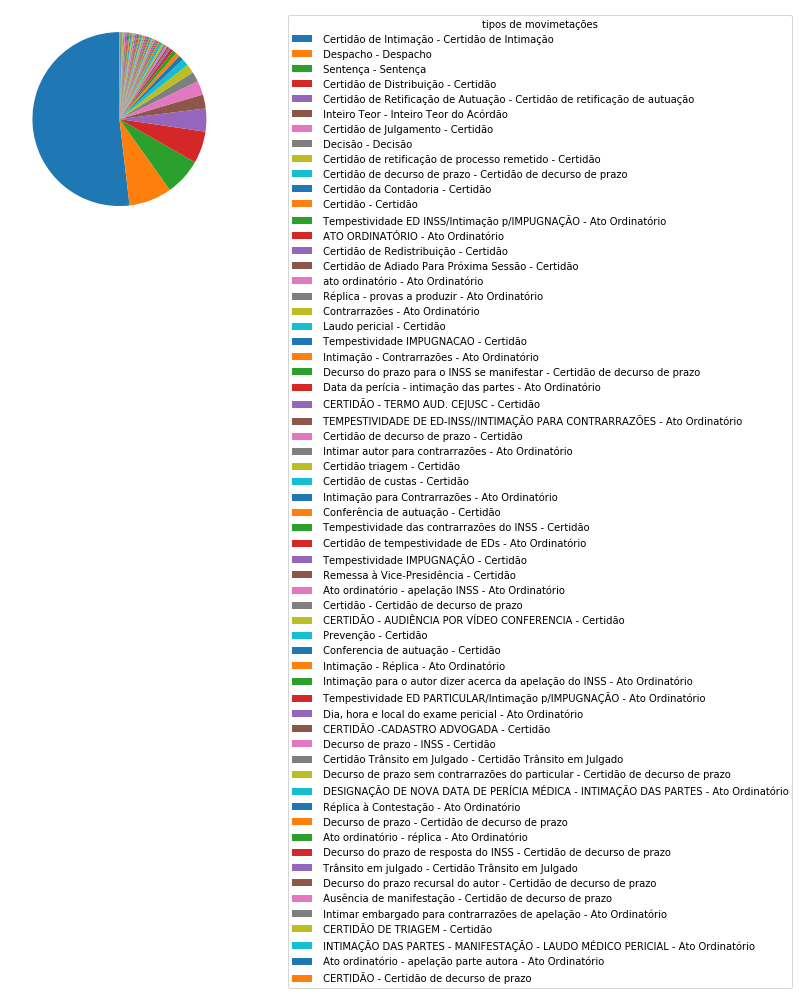

In [19]:
generetPie(movimentacoes.documento,"tipos de movimetações")

In [20]:
#"Processos unicos para as 1000 primeiras linhas"
len(movimentacoes.num_processo.unique())

17

# Lendo sobre processos, tratando informações


In [21]:
processos = pd.read_sql('''
                        Select * from processos limit {}
                        '''.format(1000), con = conn)

In [22]:
processos.head()

,num_processo,polo_ativo,polo_passivo,data_distrib,orgao_julgador,classe_judicial,assunto,assuntos_tabela,url_atual,fonte_pagina
0,0819306-76.2017.4.05.8300,JOSE EDSON DA SILVA LINS\nAPELANTE\n JOAO L...,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,27/07/2018,Gab 15 - Des. EDILSON NOBRE,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he..."
1,0819287-70.2017.4.05.8300,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,TOMAS DE ALBUQUERQUE LAPA\nAPELADO\n RICARD...,23/04/2018,Gab 2 - Des. ALEXANDRE LUNA FREIRE,APELAÇÃO CÍVEL,DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DI...,DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DI...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he..."
2,0819272-04.2017.4.05.8300,SHEILA MARIA VIEIRA DE ALMEIDA\nAPELANTE\n ...,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,21/11/2018,Gab 12 - Des. VLADIMIR CARVALHO,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he..."
3,0819217-53.2017.4.05.8300,KLEBER FERREIRA DA SILVA\nAPELANTE\n GENER ...,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,24/10/2018,Gab 2 - Des. ALEXANDRE LUNA FREIRE,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|P...,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|P...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he..."
4,0819216-68.2017.4.05.8300,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,ANTONIO ALVES TIMOTEO JUNIOR\nAPELADO\n luc...,09/08/2018,Gab 1 - Des. LÁZARO GUIMARÃES,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he..."


In [23]:
processos['advogado_apelado'] = 'sem advogado'
processos['apelado'] = 'sem apelado'
processos['qtd_advogados_apelados'] = 0
processos['qtd_apelados'] = 0

In [24]:
for index, row in processos.iterrows():
    values = processos.loc[index,'polo_passivo'].split("\n")
    advogado = 0
    apelado = 0
    for pos,name in enumerate(values) :
        if(name.lower() == "advogado"):
            processos.loc[index,'advogado_apelado'] = values[pos-1]
            advogado+=1
        elif(name.lower()=="apelado"):
            processos.loc[index,name.lower()] = values[pos-1]
            apelado+=1
    processos.loc[index,"qtd_advogados_apelados"] = advogado
    processos.loc[index,"qtd_apelados"] = apelado
    
    

In [25]:
processos.head(100)

,num_processo,polo_ativo,polo_passivo,data_distrib,orgao_julgador,classe_judicial,assunto,assuntos_tabela,url_atual,fonte_pagina,advogado_apelado,apelado,qtd_advogados_apelados,qtd_apelados
0,0819306-76.2017.4.05.8300,JOSE EDSON DA SILVA LINS\nAPELANTE\n JOAO L...,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,27/07/2018,Gab 15 - Des. EDILSON NOBRE,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",sem advogado,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS,0,1
1,0819287-70.2017.4.05.8300,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,TOMAS DE ALBUQUERQUE LAPA\nAPELADO\n RICARD...,23/04/2018,Gab 2 - Des. ALEXANDRE LUNA FREIRE,APELAÇÃO CÍVEL,DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DI...,DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DI...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",RICARDO JOSÉ LUCAS PRAGANA FILHO - PE021809-D,TOMAS DE ALBUQUERQUE LAPA,1,1
2,0819272-04.2017.4.05.8300,SHEILA MARIA VIEIRA DE ALMEIDA\nAPELANTE\n ...,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,21/11/2018,Gab 12 - Des. VLADIMIR CARVALHO,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",sem advogado,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS,0,1
3,0819217-53.2017.4.05.8300,KLEBER FERREIRA DA SILVA\nAPELANTE\n GENER ...,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,24/10/2018,Gab 2 - Des. ALEXANDRE LUNA FREIRE,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|P...,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|P...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",sem advogado,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS,0,1
4,0819216-68.2017.4.05.8300,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,ANTONIO ALVES TIMOTEO JUNIOR\nAPELADO\n luc...,09/08/2018,Gab 1 - Des. LÁZARO GUIMARÃES,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",lucia amair malta lessa de azevedo - PE21294,ANTONIO ALVES TIMOTEO JUNIOR,1,1
5,0819039-07.2017.4.05.8300,CRISTINA MARIA GOMES DA SILVA\nAPELANTE\n E...,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,16/05/2018,Gabinete SREEO,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|Pedidos Genéricos Relat...,DIREITO PREVIDENCIÁRIO|Pedidos Genéricos Relat...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",sem advogado,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS,0,1
6,0818860-73.2017.4.05.8300,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,20/04/2018,Gab 8 - Des. FERNANDO BRAGA,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|RMI - Renda Mensal Inic...,DIREITO PREVIDENCIÁRIO|RMI - Renda Mensal Inic...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",rosemar angelo melo - PR26033,MARIA DO SOCORRO SILVA RAMOS DE ANDRADE,1,2
7,0818817-39.2017.4.05.8300,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,EURIPEDES JOTA CORREA\nAPELADO\n HELDER COS...,03/07/2018,Gab 1 - Des. LÁZARO GUIMARÃES,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|RMI - Renda Mensal Inic...,DIREITO PREVIDENCIÁRIO|RMI - Renda Mensal Inic...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",HELDER COSTA DA CÂMARA - PE700-A,EURIPEDES JOTA CORREA,1,1
8,0818736-90.2017.4.05.8300,ADJAMERSON SANTOS MENDONCA\nAPELANTE\n BRUN...,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,17/01/2018,Gab 5 - Des. ROBERTO MACHADO,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|Bene

In [26]:
processos['assunto1']= ''
processos['assunto2']= ''
processos['assunto3']= ''
processos['assunto4']= ''
for index, row in processos.iterrows():
    values = processos.loc[index,'assunto'].split("|")    
    while(len(values)>4):
        values.pop()
    for i in range(len(values)):
        processos.loc[index, "assunto"+str(i+1)] = values[i]

In [27]:
processos['advogado_apelante'] = 'sem advogado'
processos['apelante'] = 'sem apelante'
processos['qtd_advogado_apelante'] = 0
processos['qtd_apelantes'] = 0
for index, row in processos.iterrows():
    values = processos.loc[index,'polo_ativo'].split("\n")
    advogado = 0
    apelado = 0
    for pos,name in enumerate(values) :
        if(name.lower() == "advogado"):
            processos.loc[index,'advogado_apelante'] = values[pos-1]
            advogado+=1
        elif(name.lower()=="apelante"):
            processos.loc[index,name.lower()] = values[pos-1]
            apelado+=1
    processos.loc[index,"qtd_advogado_apelante"] = int(advogado)
    processos.loc[index,"qtd_apelantes"] = int(apelado)
    
    

In [28]:
processos.head(100)

,num_processo,polo_ativo,polo_passivo,data_distrib,orgao_julgador,classe_judicial,assunto,assuntos_tabela,url_atual,fonte_pagina,advogado_apelado,apelado,qtd_advogados_apelados,qtd_apelados,assunto1,assunto2,assunto3,assunto4,advogado_apelante,apelante,qtd_advogado_apelante,qtd_apelantes
0,0819306-76.2017.4.05.8300,JOSE EDSON DA SILVA LINS\nAPELANTE\n JOAO L...,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,27/07/2018,Gab 15 - Des. EDILSON NOBRE,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",sem advogado,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS,0,1,DIREITO PREVIDENCIÁRIO,Benefícios em Espécie,Aposentadoria Especial (Art. 57/8),,JOAO LUIZ DA SILVA LIRIA - PE40649,JOSE EDSON DA SILVA LINS,1,1
1,0819287-70.2017.4.05.8300,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,TOMAS DE ALBUQUERQUE LAPA\nAPELADO\n RICARD...,23/04/2018,Gab 2 - Des. ALEXANDRE LUNA FREIRE,APELAÇÃO CÍVEL,DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DI...,DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DI...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",RICARDO JOSÉ LUCAS PRAGANA FILHO - PE021809-D,TOMAS DE ALBUQUERQUE LAPA,1,1,DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DI...,Servidor Público Civil,Sistema Remuneratório e Benefícios,Teto Salarial,sem advogado,UNIVERSIDADE FEDERAL DE PERNAMBUCO,0,2
2,0819272-04.2017.4.05.8300,SHEILA MARIA VIEIRA DE ALMEIDA\nAPELANTE\n ...,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,21/11/2018,Gab 12 - Des. VLADIMIR CARVALHO,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",sem advogado,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS,0,1,DIREITO PREVIDENCIÁRIO,Benefícios em Espécie,Auxílio-Doença Previdenciário,,DIRCEU CARNEIRO LEÃO FILHO - PE016418-D,SHEILA MARIA VIEIRA DE ALMEIDA,1,1
3,0819217-53.2017.4.05.8300,KLEBER FERREIRA DA SILVA\nAPELANTE\n GENER ...,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,24/10/2018,Gab 2 - Des. ALEXANDRE LUNA FREIRE,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|P...,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|P...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",sem advogado,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS,0,1,DIREITO PREVIDENCIÁRIO,Benefícios em Espécie,Pensão por Morte (Art. 74/9),,GENER DE SOUZA SERRALVA RODRIGUES - PE26798-D,KLEBER FERREIRA DA SILVA,2,1
4,0819216-68.2017.4.05.8300,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,ANTONIO ALVES TIMOTEO JUNIOR\nAPELADO\n luc...,09/08/2018,Gab 1 - Des. LÁZARO GUIMARÃES,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,DIREITO PREVIDENCIÁRIO|Benefícios em Espécie|A...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",lucia amair malta lessa de azevedo - PE21294,ANTONIO ALVES TIMOTEO JUNIOR,1,1,DIREITO PREVIDENCIÁRIO,Benefícios em Espécie,Aposentadoria Especial (Art. 57/8),,sem advogado,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS,0,1
5,0819039-07.2017.4.05.8300,CRISTINA MARIA GOMES DA SILVA\nAPELANTE\n E...,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,16/05/2018,Gabinete SREEO,APELAÇÃO CÍVEL,DIREITO PREVIDENCIÁRIO|Pedidos Genéricos Relat...,DIREITO PREVIDENCIÁRIO|Pedidos Genéricos Relat...,https://pje.trf5.jus.br/pje/ConsultaPublica/De...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",sem advogado,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS,0,1,DIREITO PREVIDENCIÁRIO,Pedidos Genéricos Relativos aos Benefícios em ...,Data de Início de Benefício (DIB),,Evandro José Lago - CE23560,CRISTINA MARIA GOMES DA SILVA,1,1
6,0818860-73.2017.4.05.8300,INSTITUTO NACIONAL DO SEGURO SOCIAL - INSS\nAP...,INS

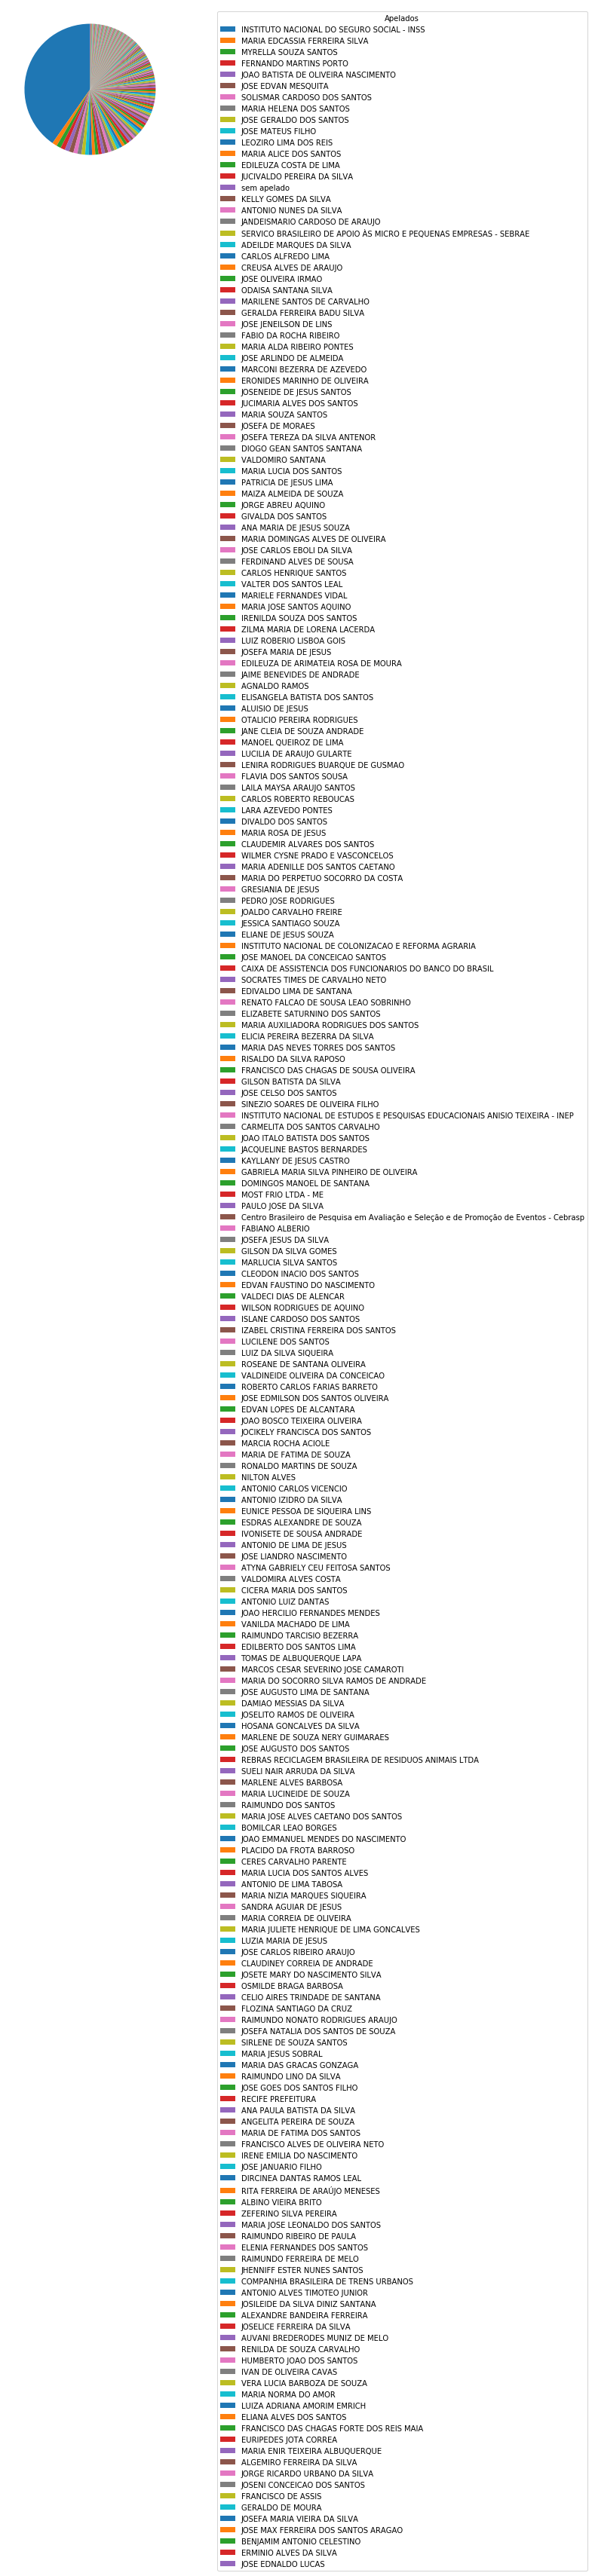

In [29]:
generetPie(processos.apelado,"Apelados")

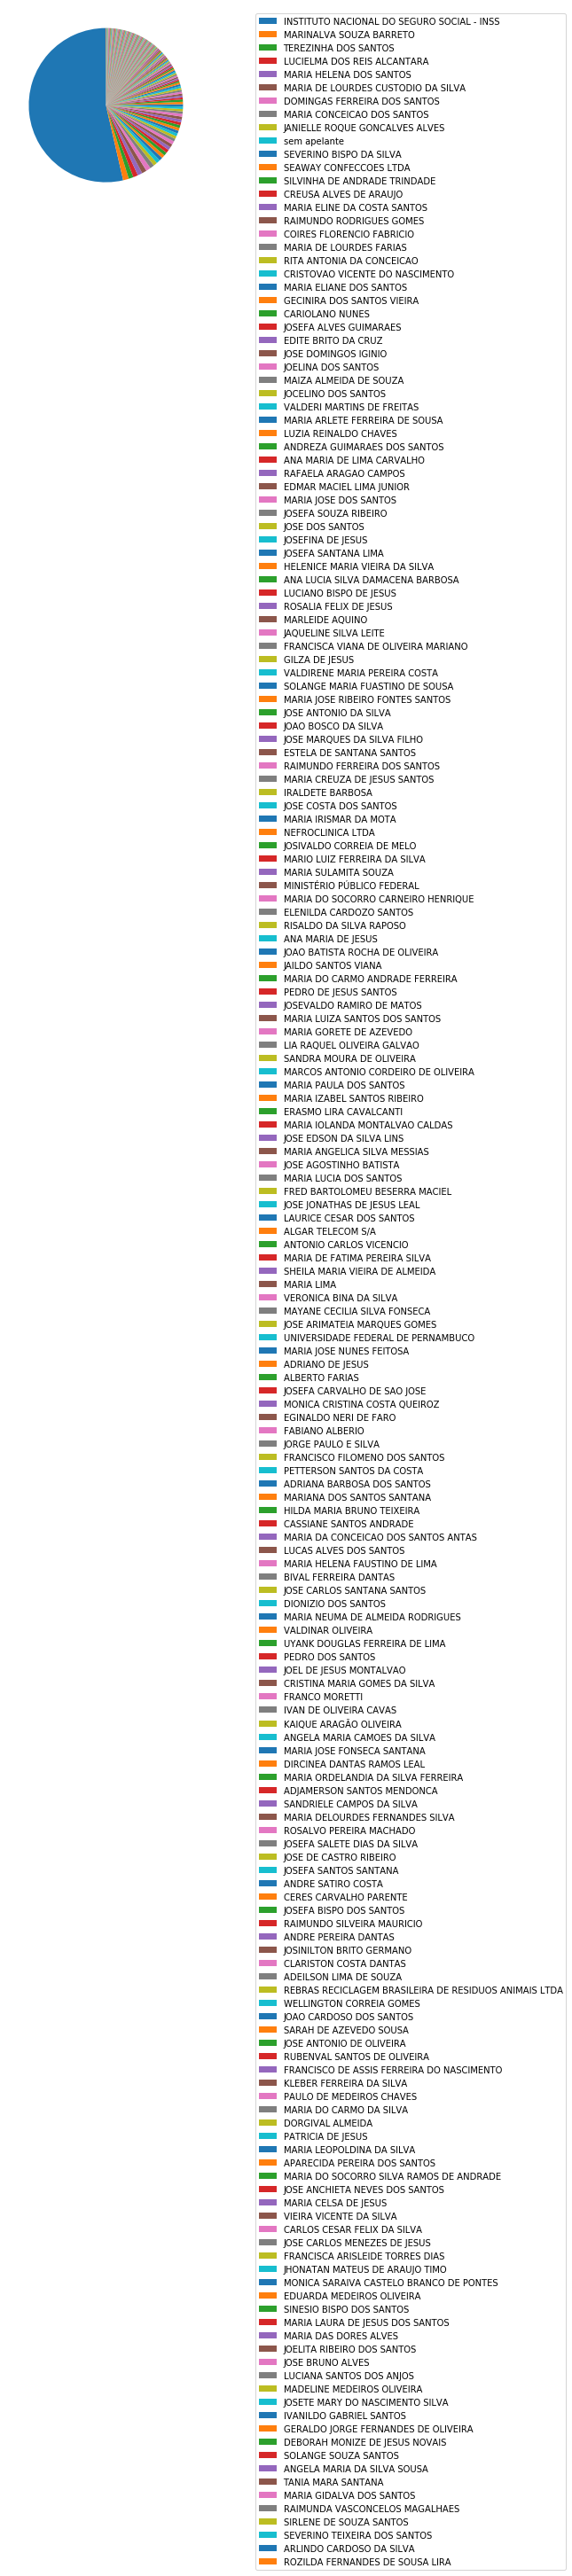

In [30]:
generetPie(processos.apelante)

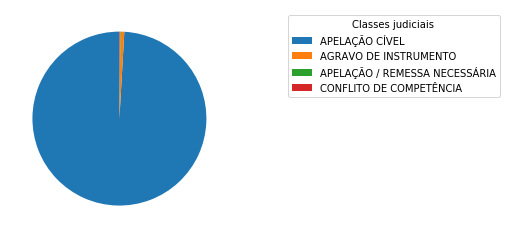

In [31]:
generetPie(processos.classe_judicial,'Classes judiciais')

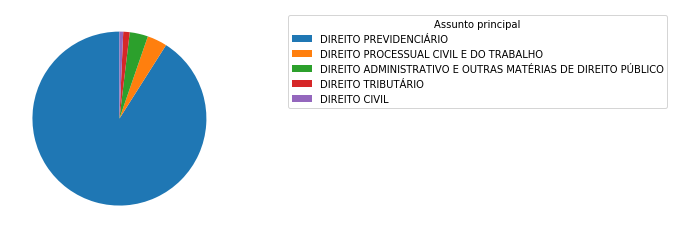

In [32]:
generetPie(processos.assunto1,"Assunto principal")